In [4]:
import pandas as pd
from ast import literal_eval

In [5]:
dataset_df = pd.read_csv('data.csv',encoding="utf-8",converters={"tags":literal_eval})
dataset_df

,Unnamed: 0,name,steam_appid,release_date,is_free,required_age,rate,price,owners,tags
0,0,Dota 2,570,2013,True,0,0.829342,0,350000000,"[Free to Play, MOBA, Multiplayer, Strategy, e-..."
1,1,Counter-Strike: Global Offensive,730,2012,True,0,0.882848,0,75000000,"[FPS, Shooter, Multiplayer, Competitive, Actio..."
2,2,New World,1063730,2021,False,0,0.680567,3999,75000000,"[Massively Multiplayer, Open World, MMORPG, RP..."
3,3,Team Fortress 2,440,2007,True,0,0.936167,0,75000000,"[Free to Play, Hero Shooter, Multiplayer, FPS,..."
4,4,Apex Legends™,1172470,2020,True,0,0.858303,0,75000000,"[Free to Play, Multiplayer, Battle Royale, Sho..."
...,...,...,...,...,...,...,...,...,...,...
48858,48858,VEHICLES FURY,749290,2017,False,0,0.166667,1499,10000,"[Action, Indie, Racing, Sports]"
48859,48859,Crawler,1506770,2021,False,0,0.416667,399,10000,"[Adventure, Action RPG, Exploration, Dungeon C..."
48860,48860,Coins Collector Simulator,1868280,2022,False,0,0.625000,499,10000,"[Casual, Racing, Simulation, Sports, Strategy,..."
48861,48861,You Arrive in a Town,1466190,2021,False,0,0.473684,499,10000,"[Indie, Action, Casual, RPG, Action RPG, Arcad..."


In [3]:
'''
dictionary
key: year
val: dictionary mapping tag to number
'''
year_tag_dict = {}
for index, row in dataset_df.iterrows():
    year = row["release_date"]
    tags = row["tags"]
    if year in year_tag_dict:
        tag_count_dict = year_tag_dict[year]
        for tag in tags:
            if tag in tag_count_dict:
                tag_count_dict[tag] += 1
            else:
                tag_count_dict[tag] = 1
    else:
        year_tag_dict[year] = {}
        for tag in tags:
            year_tag_dict[year][tag] = 1

## Parse data for visualization 1, force directed graph of tags

In [15]:
'''
GOAL: json
{
    "nodes": [{"id": "tagname1", "group": 1}],
    "links": [{"source": "tagname1", "target": "tagname2", "value": co-occurance}]
}
'''
tag_name = {}
for i,row in dataset_df.iterrows():
    tags = row["tags"]
    for tag in tags:
        if tag not in tag_name:
            tag_name[tag] = 1
        else:
            tag_name[tag] += 1

In [17]:
tag_name

{'Free to Play': 3409,
 'MOBA': 120,
 'Multiplayer': 4994,
 'Strategy': 9800,
 'e-sports': 277,
 'Team-Based': 501,
 'Competitive': 632,
 'Action': 20550,
 'Online Co-Op': 1182,
 'PvP': 1791,
 'Difficult': 3988,
 'Co-op': 2459,
 'RTS': 990,
 'Tower Defense': 879,
 'Fantasy': 4920,
 'RPG': 8361,
 'Character Customization': 1530,
 'Replay Value': 1383,
 'Action RPG': 1510,
 'Simulation': 9409,
 'FPS': 2604,
 'Shooter': 3860,
 'Tactical': 1775,
 'First-Person': 4754,
 'Military': 835,
 'War': 1141,
 'Trading': 217,
 'Realistic': 1998,
 'Fast-Paced': 1175,
 'Moddable': 479,
 'Massively Multiplayer': 1022,
 'Open World': 2740,
 'MMORPG': 290,
 'Adventure': 20402,
 'PvE': 1216,
 'Walking Simulator': 1400,
 'Crafting': 1031,
 'Third Person': 2776,
 'Open World Survival Craft': 165,
 'Sandbox': 1716,
 'Violent': 2859,
 'Sexual Content': 2304,
 'Souls-like': 481,
 'Hero Shooter': 254,
 'Class-Based': 215,
 'Funny': 4697,
 'Cartoony': 2322,
 'Comedy': 2996,
 'Robots': 801,
 'Cartoon': 1476,
 'Ba

In [21]:
tag_name.values()

dict_values([3409, 120, 4994, 9800, 277, 501, 632, 20550, 1182, 1791, 3988, 2459, 990, 879, 4920, 8361, 1530, 1383, 1510, 9409, 2604, 3860, 1775, 4754, 835, 1141, 217, 1998, 1175, 479, 1022, 2740, 290, 20402, 1216, 1400, 1031, 2776, 165, 1716, 2859, 2304, 481, 254, 215, 4697, 2322, 2996, 801, 1476, 233, 2708, 3733, 449, 480, 781, 722, 1285, 972, 22527, 30838, 21355, 7865, 460, 562, 1036, 799, 1927, 3749, 4449, 2509, 1487, 1276, 144, 1941, 508, 254, 1176, 1114, 12149, 6153, 1402, 4966, 4855, 59, 2403, 322, 667, 525, 2728, 1767, 4419, 2366, 806, 242, 1881, 3747, 482, 767, 122, 470, 260, 180, 1250, 469, 4058, 1072, 5443, 45, 758, 171, 205, 5681, 703, 2567, 1427, 502, 1388, 21, 1278, 89, 6693, 1156, 336, 3062, 108, 1065, 166, 5607, 1533, 433, 1, 1, 1, 2, 3, 28, 13, 37, 9, 2228, 834, 2534, 2347, 2654, 9126, 2069, 1219, 786, 1143, 2423, 1250, 2165, 1565, 300, 264, 614, 251, 1006, 169, 787, 153, 712, 1719, 149, 2372, 156, 376, 1650, 641, 2183, 3963, 3338, 568, 367, 198, 384, 1327, 1493, 291, 

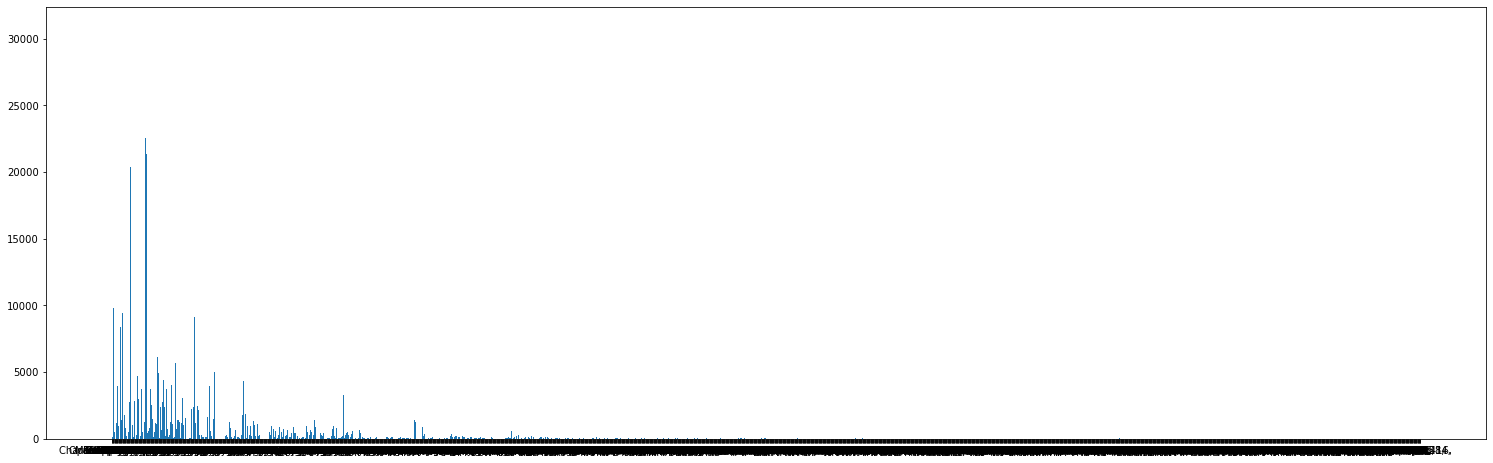

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,6))
ax = fig.add_axes([0,0,1,1])
langs = tag_name.keys()
students = tag_name.values()
ax.bar(langs,students)
plt.show()

In [13]:
result = []
mystring = "test:asd,etst:asdasd,tsefse:asddas"
ret = mystring.split(",")
for i in ret:
    a = i.split(":")
    result.append(a[0])
print(result)

['test', 'etst', 'tsefse']
